In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../../')

import matplotlib.pyplot as plt

In [3]:
# Default locations and patch size

img_base_dir = '../../data/panda/images/'
mask_base_dir = '../../data/panda/masks_prep/'
patch_size = 256

In [4]:
import os
from src.cancer_indicator.patch_mask_preparer import PatchMaskPreparer

# The prepared masks all have:
pmp = PatchMaskPreparer(
    image_base_dir=img_base_dir,                # directory that contains the images (*.tiff)
    mask_base_dir=mask_base_dir,                # directory that contains the processed masks (*.tiff)
    mask_filename_suffix="_mask",               # suffix to add to the image filename to get the mask filename
    
    # The preprocessed masks have the following attributed
    mask_downsample_rate=16,                    # downsampled by a factor of 16 compared to the original image
    fg_mask_channel=3,                          # mask channel that contains the foreground mask is at position 3
    label_mask_channel=2,                       # mask channel that contains the label mask (cancer yes no) is at position 2
    
    # The following thresholds define the patch-wise label generation from the segmentation masks 
    patch_size=patch_size,                      # patch size to use
    label_mask_threshold=0.5,                   # minimum relative amount of fg on the patch
    fg_mask_threshold=0.1,                      # minimum amount of cancer on the tissue to be considered a cancerous patch
)

fns = pmp.get_filenames()
fns

Removed 0 image/mask pairs. (not found)


['00e6511435645e50673991768a713c66.tiff',
 '000920ad0b612851f8e01bcc880d9b3d.tiff',
 '004dd32d9cd167d9cc31c13b704498af.tiff',
 '00c15b23b30a5ba061358d9641118904.tiff',
 '005e66f06bce9c2e49142536caf2f6ee.tiff',
 '002a4db09dad406c85505a00fb6f6144.tiff',
 '00ed4dbf9af6cc102e04cc9a42b313e2.tiff',
 '003046e27c8ead3e3db155780dc5498e.tiff',
 '0076bcb66e46fb485f5ba432b9a1fe8a.tiff',
 '00a76bfbec239fd9f465d6581806ff42.tiff',
 '001d865e65ef5d2579c190a0e0350d8f.tiff',
 '008069b542b0439ed69b194674051964.tiff',
 '001c62abd11fa4b57bf7a6c603a11bb9.tiff',
 '0018ae58b01bdadc8e347995b69f99aa.tiff',
 '003a91841da04a5a31f808fb5c21538a.tiff',
 '00bbc1482301d16de3ff63238cfd0b34.tiff',
 '00d8a8c04886379e266406fdeff81c45.tiff',
 '0068d4c7529e34fd4c9da863ce01a161.tiff',
 '007433133235efc27a39f11df6940829.tiff',
 '00ee879798782aca1248baa9132d7307.tiff',
 '0005f7aaab2800f6170c399693a96917.tiff',
 '00fbee5161d8cc715b3fe69e16cdf147.tiff',
 '00ca0c23961b5510be46c917be11c43e.tiff',
 '00a26aaa82c959624d90dfb69fcf259c

In [5]:
coords_df = pmp.get_patch_coords(fns)
coords_df

Removed 0 image/mask pairs. (not found)
Loading Patch Coords from cache...
Loading Uncached Patches: 0it [00:00, ?it/s]


,filename,row,col,value,label
0,004391d48d58b18156f811087cd38abf.tiff,10,91,1.0,1.0
1,004391d48d58b18156f811087cd38abf.tiff,10,92,1.0,1.0
2,004391d48d58b18156f811087cd38abf.tiff,11,90,1.0,1.0
3,004391d48d58b18156f811087cd38abf.tiff,11,91,1.0,1.0
4,004391d48d58b18156f811087cd38abf.tiff,11,92,1.0,1.0
...,...,...,...,...,...
21315,00d8a8c04886379e266406fdeff81c45.tiff,90,5,0.0,0.0
21316,00d8a8c04886379e266406fdeff81c45.tiff,90,6,0.0,0.0
21317,00d8a8c04886379e266406fdeff81c45.tiff,90,7,0.0,0.0
21318,00d8a8c04886379e266406fdeff81c45.tiff,91,3,0.0,0.0


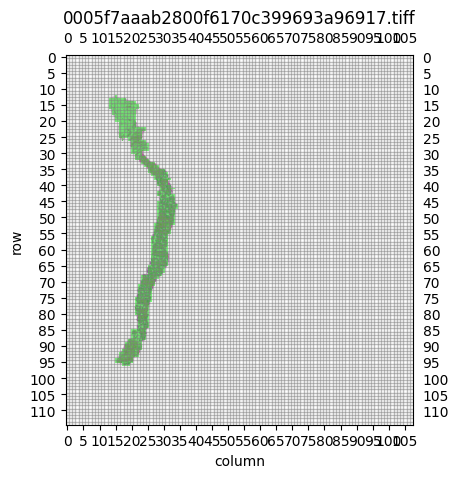

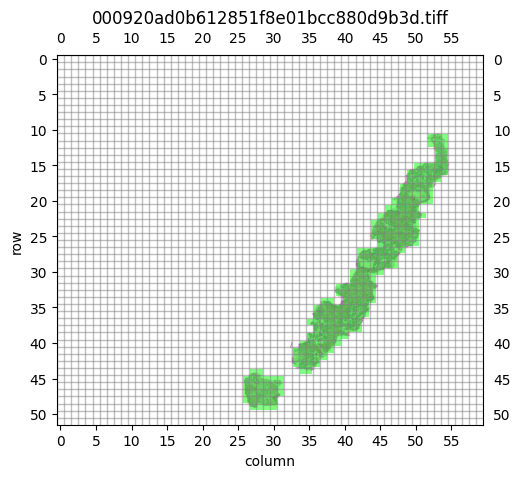

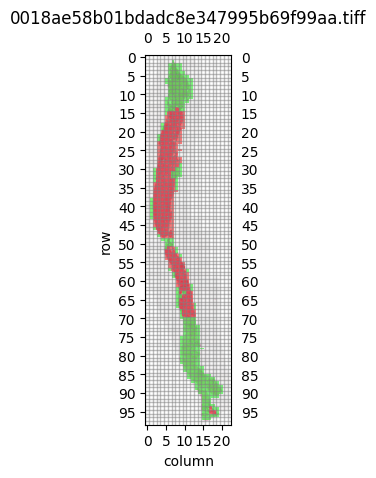

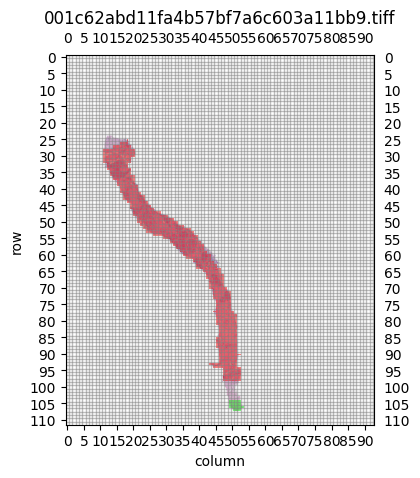

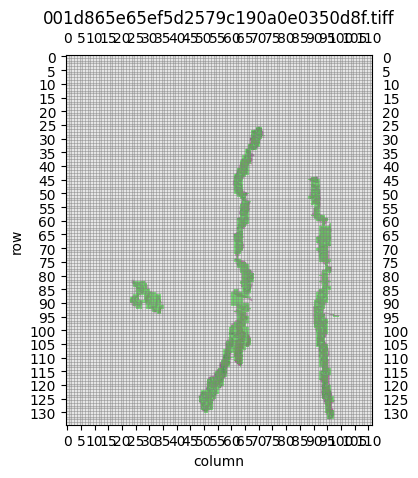

In [8]:
# From the dataframe, plot the labels on top of the corresponding patches as a green and red overlay
for i, (name, fn_df) in enumerate(coords_df.groupby('filename')):
    ax = pmp._plot_patch_mask_overview(fn_df)
    ax.set_title(name)
    plt.savefig(f'output/patch_mask_overview_{i}.png', bbox_inches='tight')
    plt.show()

    if i>3:
        break